# Setup

In [1]:
# Auto reload settings
#%%

%load_ext autoreload
%autoreload 2

In [2]:
# Imports to save data into google spreadsheet.

from google.oauth2.service_account import Credentials
import gspread
import os
from gspread_pandas import Spread, Client 

scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

credentials = Credentials.from_service_account_file(
    os.path.expanduser('~/.config/gspread/arorakus_gcloud_api_key.json'),
    scopes=scopes
)

gc = gspread.authorize(credentials)

sh = gc.open("Entropy Aware Beam Search")
# spread = Spread("Entropy Aware Beam Search")

OSError: No Google client config found.
Please download json from https://console.developers.google.com/apis/credentials and save as /home/mila/a/arorakus/.config/gspread_pandas/google_secret.json

In [ ]:
# Imports

%load_ext autoreload
from parlai_internal.projects.entropy_beam_search.next_token_distribution_analysis import process_datapoint,parse_test_split, load_model, parse_world_log_metadatafile, compute_ngram_repeats, predict, compute_average_across_sequences, print_sample, moving_average, print_with_colors
from parlai.utils.strings import colorize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import copy
pd.options.plotting.backend = "matplotlib"


In [ ]:
# Load GPT2 model

# gpt2_modelfile = '/checkpoint/kushalarora/projects/entropy_beam_search/wiki103/gpt2//fine_tune_gpt2/202206281610/chilly_tang.job_0/model'
gpt2_modelfile = "/checkpoint/jase/projects/pacer/gan_gpt2/fine_tune_gpt2/0e7.job_1/model"
gpt2_test_data = ''
gpt2_model = load_model(model_filepath=gpt2_modelfile)


15:24:07 | Using CUDA
15:24:19 | Total parameters: 354,826,240 (354,826,240 trainable)
15:24:19 | Loading existing model params from /checkpoint/jase/projects/pacer/gan_gpt2/fine_tune_gpt2/0e7.job_1/model


In [ ]:
# Data
# human_data = "/checkpoint/jase/projects/pacer/data/base_test_500.jsonl"
human_data_wiki103 = '/checkpoint/kushalarora/projects/entropy_beam_search/data/wiki103/valid.txt'
gpt2_greedy_generation = "/checkpoint/kushalarora/projects/entropy_beam_search/data/wiki103/gpt2//gen_gpt2_valid/202206301536/surprised_ptarmigan.job_0/world_logs.jsonl"

gpt2_nucleus_generation = "/checkpoint/kushalarora/projects/pacer/gan_gpt2/gen_gpt2_nucleus_valid/202206291635/ordinary_spiketail.job_0/world_logs.jsonl"


gpt2_beam_search_generation = "/checkpoint/kushalarora/projects/entropy_beam_search/data/wiki103/gpt2//gen_gpt2_beam_valid/202206291711/husky_yaffle.job_0/world_logs.jsonl"

# gpt2_entropy_aware_greedy_generation = '/checkpoint/kushalarora/projects/entropy_beam_search/data/wiki103/gpt2//gen_gpt2_entropy_aware_greedy_valid/202206300724/lawful_argusfish.job_0/world_logs.jsonl'

# gpt2_entropy_aware_greedy_generation = '/checkpoint/kushalarora/projects/entropy_beam_search/data/wiki103/gpt2//gen_gpt2_entropy_aware_greedy_valid/202206300749/bland_huia.job_0/world_logs.jsonl'


# gpt2_entropy_aware_greedy_generation = '/checkpoint/kushalarora/projects/entropy_beam_search/data/wiki103/gpt2//gen_gpt2_entropy_aware_greedy_valid/202206300802/definitive_gar.job_0/world_logs.jsonl'


gpt2_entropy_aware_greedy_generation = '/checkpoint/kushalarora/projects/entropy_beam_search/data/wiki103/gpt2//gen_gpt2_entropy_aware_greedy_valid/202206300838/gregarious_wasp.job_0/world_logs.jsonl'

gpt2_topk_generation = "/checkpoint/kushalarora/projects/pacer/gan_gpt2/gen_gpt2_topk_valid/202206301547/normal_wrenchbird.job_0/world_logs.jsonl"


In [ ]:
# Plot mean and std average entropy

def plot_avg_entropies_mean_std(entropies, ax, label):
    entropy_mean = np.mean(entropies, axis=0)
    entropy_std = np.std(entropies, axis=0)
    ax = sns.lineplot(y=entropy_mean, x=range(len(entropy_mean)), ax=ax, label=label)
    ax.set_ylim(0,6)
    ax.fill_between(range(len(entropy_mean)), entropy_mean -  entropy_std, entropy_mean +  entropy_std, alpha=0.1)
    ax=ax.set_xticks(np.arange(len(entropy_mean), step=2))


# Constants

In [ ]:
NUM_SEQ=100

# Entropy of Human Data

In [ ]:
# human_dataframe = parse_world_log_metadatafile(human_data)
human_dataframe = parse_test_split(human_data_wiki103)

In [ ]:
sample = human_dataframe.sample(1).iloc[0]
print(sample.context)
print()
print(print_with_colors(sample.model_text,sample.lrep_idxs))

caught <unk> 's collar , pushed him on the ground , knelt on him and repeatedly told him to stop . He then led the fan by his hair to the edge of the stage , where the fan jumped off . It was only after watching a video of

the incident that Blythe found out that a security officer was actually pushing the fan from back . Blythe further said that he saw <unk> trying to reach the stage yet again before finally being stopped by security . <eos> Later , when another fan tried to climb the stage , Blythe thought that it was <unk> again . Blythe testified that he approached the fan and pushed him with both hands out of the stage in the belief that the crowd would catch him , which it did not . Jiří <unk> , author of video which caught the previous incidents with <unk> , testified that the fan was for a moment lying on the ground with nobody helping him . Blythe further commented that he saw the fan get up and that other fans showed him thumbs up . Blythe insisted that he never saw <unk> nor

## Compute Average entropy across sequences.

In [ ]:
human_avg_entropy_pd, human_entropies = compute_average_across_sequences(human_dataframe, gpt2_model, column_prefix='human_generated',  max_len=100, num_seq=NUM_SEQ)
human_avg_ma_entropy_pd, human_ma_entropies = compute_average_across_sequences(human_dataframe, gpt2_model, column_prefix='human_generated', width=5,  max_len=100, to_be_averaged='entropy_ma', num_seq=NUM_SEQ)

# human_avg_dent_pd, human_dent = compute_average_across_sequences(human_dataframe, gpt2_model, column_prefix='human_generated',  max_len=100, num_seq=500,  to_be_averaged='dent', width=5)



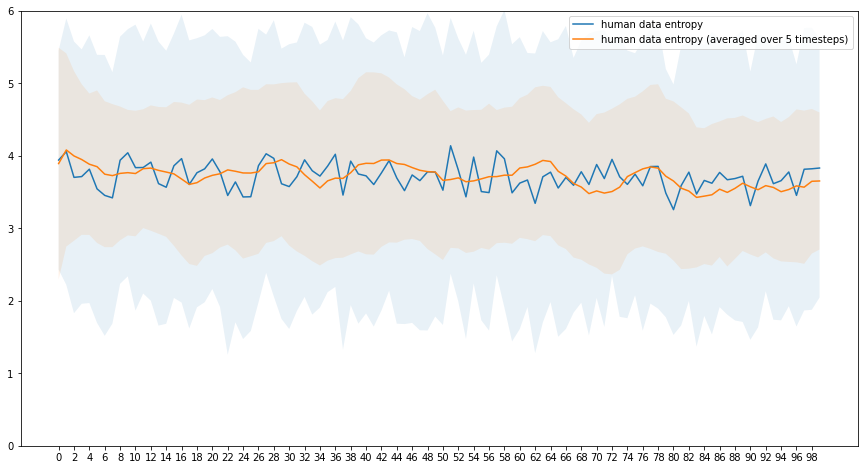

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
plot_avg_entropies_mean_std(human_entropies, ax, 'human data entropy')
plot_avg_entropies_mean_std(human_ma_entropies, ax, 'human data entropy (averaged over 5 timesteps)')

## Examples of generation

In [ ]:
human_datapoint =human_dataframe.sample(n=1)
print(human_datapoint.context.item())
print()
print_sample(human_datapoint)



in Hollywood . In July 2009 Harry Potter and the Half @-@ Blood Prince was released , the series ' sixth instalment . Radcliffe received nominations for " Best Male Performance " and " Global Superstar " at the 2010 MTV Movie Awards . <eos> For financial and scripting reasons

the last book was divided into two films , shot back to back , which drew criticism from the series ' fanbase . Radcliffe defended the split , stating that it would have been impossible to properly adapt the final novel into a single film . He added that the last movie was going to be extremely fast @-@ paced with a lot of action , while the first part would be far more sedate , focusing on character development ; he added that , had they combined them , those things would not have made it to the final cut . Filming lasted for a year , concluding in June 2010 and on the last day of shooting , like most of the cast and crew , Radcliffe openly wept . <eos> The final film , Harry Potter and the Deathly Hallows – Par

In [ ]:

labeled_datapointh = process_datapoint(
    model=gpt2_model, datapoint=human_datapoint.iloc[0], width=5
)

lpdh = pd.DataFrame(labeled_datapointh, columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep', 'entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='index'>

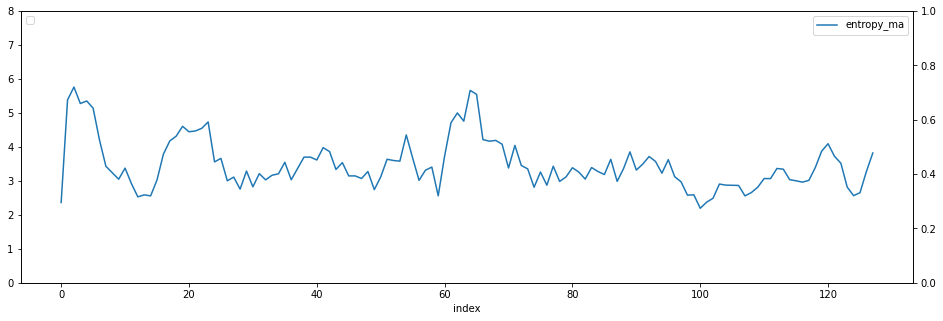

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
ax2 = ax.twinx()
# lpdh.plot.bar(x='index', y='is_lrep', ax=ax2, fill=True, rot='60')
ax2.legend(loc=2)
# lpdh.plot(x="index", y='entropy', ylim=(0,6), ax=ax)

# lpdh.plot(x="index", y='entropy', ylim=(0,8), ax=ax)
lpdh.plot(x="index", y='entropy_ma', ylim=(0,8), ax=ax)
# lpdh.plot(x="index", y='probs', ylim=(0,1), ax=ax)


# lpdh.plot.bar( y='dent',  ylim=(-4,8), figsize=(16, 5), ax=ax, linestyle='dashed')
# lpdh.plot.bar( y='ddent', ylim=(-2,8), figsize=(16, 5),  ax=ax, linestyle='-.')
# lpdh.plot( y='dddent',  ylim=(-6,6),figsize=(16, 5),  ax=ax, linestyle='--')
# ax.set_xticklabels(lpdh['token'])
# ax.tick_params(axis='x', labelrotation=60)

# ax.set_yticklabels(range(-6,6))
# ax.set_xticklabels(lpdh['token'])

# ax2.tick_params(axis='x', labelrotation=60)


# Entropy of Model Data (Greedy)

In [ ]:
model_greedy_dataframe = parse_world_log_metadatafile(gpt2_greedy_generation)
# model_nucleus_dataframe = parse_world_log_metadatafile(gpt2_nucleus_generation)
# model_beam_search_dataframe = parse_world_log_metadatafile(gpt2_beam_search_generation)
model_entropy_aware_greedy_dataframe = parse_world_log_metadatafile(gpt2_entropy_aware_greedy_generation)
model_entropy_topk_dataframe = parse_world_log_metadatafile(gpt2_topk_generation)


## Do errors cascade?

Text(0.5, 1.0, '3-gram repeat distribution in sequences with at least on 3-gram repetiion.')

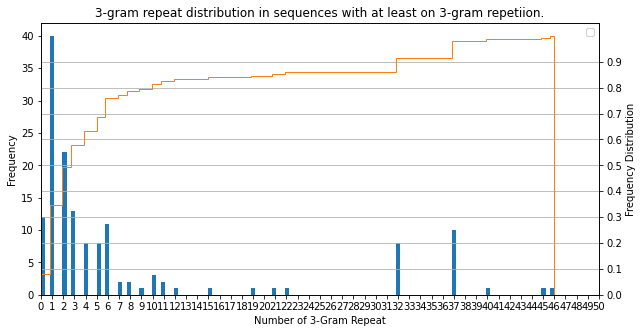

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

num_3_gram_series = human_dataframe[human_dataframe.has_3_gram_repeat][["num_3_gram_repeat_length_normalized"]]
ax = num_3_gram_series.plot.hist(
        xlim=(0, 50), 
        xticks=range(0, 51),
        figsize=(10, 5), 
        bins=120,
        # density=1, 
        # cumulative=True,
        ax=ax,
        # rot=45,
        )

ax.legend([])

num_3_gram_series.plot.hist(
        xlim=(0, 50), 
        xticks=range(0, 51),
        yticks=np.arange(0, 10, 1)* 0.1,
        figsize=(10, 5), 
        bins=120,
        density=1, 
        cumulative=True,
        color='tab:orange',
        histtype='step',
        ax=ax2,
        grid=True,
        # logy=2,
        # label="CDF",
        # rot=45,
)
ax2.set_ylabel("Frequency Distribution")
ax.set_xlabel("Number of 3-Gram Repeat")
ax2.legend([])
plt.title("3-gram repeat distribution in sequences with at least on 3-gram repetiion.")

Text(0.5, 1.0, '3-gram repeat distribution in sequences with at least on 3-gram repetiion.')

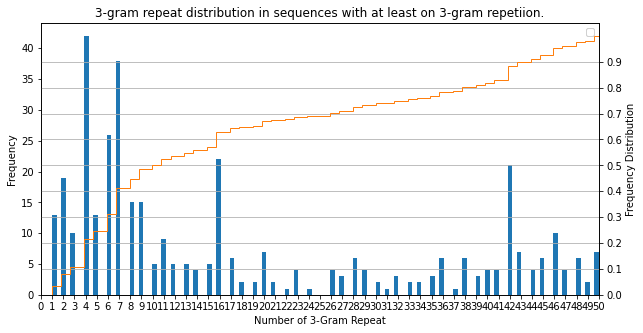

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

num_3_gram_series = model_greedy_dataframe[model_greedy_dataframe.has_3_gram_repeat][["num_3_gram_repeat_length_normalized"]]
ax = num_3_gram_series.plot.hist(
        xlim=(0, 50), 
        xticks=range(0, 51),
        figsize=(10, 5), 
        bins=120,
        # density=1, 
        # cumulative=True,
        ax=ax,
        # rot=45,
        )

ax.legend([])

num_3_gram_series.plot.hist(
        xlim=(0, 50), 
        xticks=range(0, 51),
        yticks=np.arange(0, 10, 1)* 0.1,
        figsize=(10, 5), 
        bins=120,
        density=1, 
        cumulative=True,
        color='tab:orange',
        histtype='step',
        ax=ax2,
        grid=True,
        # logy=2,
        # label="CDF",
        # rot=45,
)
ax2.set_ylabel("Frequency Distribution")
ax.set_xlabel("Number of 3-Gram Repeat")
ax2.legend([])
plt.title("3-gram repeat distribution in sequences with at least on 3-gram repetiion.")

Text(0.5, 1.0, '3-gram repeat distribution in sequences with at least on 3-gram repetiion.')

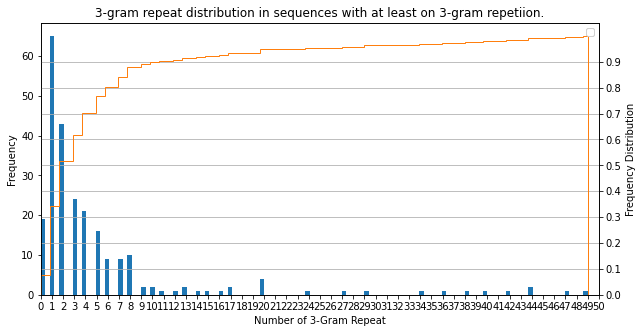

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

num_3_gram_series = model_entropy_topk_dataframe[model_entropy_topk_dataframe.has_3_gram_repeat][["num_3_gram_repeat_length_normalized"]]
ax = num_3_gram_series.plot.hist(
        xlim=(0, 50), 
        xticks=range(0, 51),
        figsize=(10, 5), 
        bins=120,
        # density=1, 
        # cumulative=True,
        ax=ax,
        # rot=45,
        )

ax.legend([])

num_3_gram_series.plot.hist(
        xlim=(0, 50), 
        xticks=range(0, 51),
        yticks=np.arange(0, 10, 1)* 0.1,
        figsize=(10, 5), 
        bins=120,
        density=1, 
        cumulative=True,
        color='tab:orange',
        histtype='step',
        ax=ax2,
        grid=True,
        # logy=2,
        # label="CDF",
        # rot=45,
)
ax2.set_ylabel("Frequency Distribution")
ax.set_xlabel("Number of 3-Gram Repeat")
ax2.legend([])
plt.title("3-gram repeat distribution in sequences with at least on 3-gram repetiion.")

Text(0.5, 1.0, '3-gram repeat distribution in sequences with at least on 3-gram repetiion.')

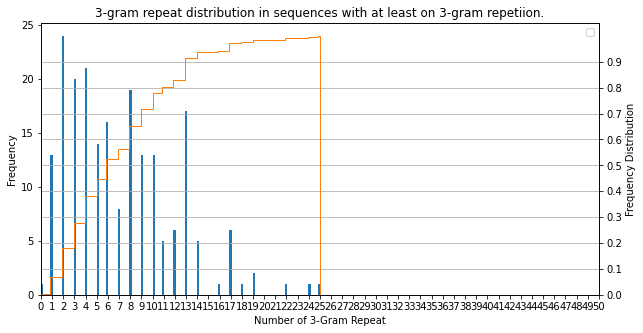

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

num_3_gram_series = model_entropy_aware_greedy_dataframe[model_entropy_aware_greedy_dataframe.has_3_gram_repeat][["num_3_gram_repeat_length_normalized"]]
ax = num_3_gram_series.plot.hist(
        xlim=(0, 50), 
        xticks=range(0, 51),
        figsize=(10, 5), 
        bins=120,
        # density=1, 
        # cumulative=True,
        ax=ax,
        # rot=45,
        )

ax.legend([])

num_3_gram_series.plot.hist(
        xlim=(0, 50), 
        xticks=range(0, 51),
        yticks=np.arange(0, 10, 1)* 0.1,
        figsize=(10, 5), 
        bins=120,
        density=1, 
        cumulative=True,
        color='tab:orange',
        histtype='step',
        ax=ax2,
        grid=True,
        # logy=2,
        # label="CDF",
        # rot=45,
)
ax2.set_ylabel("Frequency Distribution")
ax.set_xlabel("Number of 3-Gram Repeat")
ax2.legend([])
plt.title("3-gram repeat distribution in sequences with at least on 3-gram repetiion.")

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

model_greedy_dataframe.num_3_gram_repeat.plot.hist(
        xlim=(0, 120), 
        xticks=range(0, 120, 5),
        figsize=(10, 5), 
        bins=120,
        # density=1, 
        # cumulative=True,
        ax=ax,
        )

model_greedy_dataframe.num_3_gram_repeat.plot.hist(
        xlim=(0, 120), 
        # xticks=range(0, 128),
        yticks=np.arange(0, 11, 1)* 0.1,
        figsize=(10, 5), 
        bins=120,
        density=1, 
        cumulative=True,
        color='tab:orange',
        histtype='step',
        ax=ax2,
        grid=True,
        # label="CDF"
)

ax2.set_ylabel("Frequency Distribution")
ax.set_xlabel("Number of 3-Gram Repeat")
ax2.legend([])
plt.title("3-gram repeat distribution in sequences (w/o length normalization.")

## Examples of various amounts of 3-gram repetition.

In [ ]:
gpt2_greedy_generation

'/checkpoint/kushalarora/projects/entropy_beam_search/data/wiki103/gpt2//gen_gpt2_valid/202206301536/surprised_ptarmigan.job_0/world_logs.jsonl'

In [ ]:
# 2 3-gram repetiions

with_label_repeat_dataframe = model_greedy_dataframe[model_greedy_dataframe.lreps_num_3_gram_repeat > 5][model_greedy_dataframe.creps_num_3_gram_repeat == 0]

sample = with_label_repeat_dataframe.sample(1)
print(sample.context.item())
print()
print_sample(sample)

. In addition , there are indications that Scientology poses a threat to Germany 's basic political principles . " <eos> A United Nations report in April 1998 raised concerns about the violation of individual rights posed by sect filters . However , it rejected the comparison of the treatment

 of the Rohingya Muslims to the treatment of the Jews in Nazi Germany.  The report was based on interviews with Rohingya Muslims in Rakhine State, Myanmar. The Rohingya were forced to leave their homes and flee to Bangladesh in the early 1990s. The UN report stated that the Rohingya were subjected to "systematic and systematic abuse" by the Myanmar military and the government of Myanmar.  The report also stated that the Rohingya were subjected to "systematic and systematic abuse" by the Myanmar military and the government of Myanmar. The report stated that the Rohingya were subjected to "systematic and systematic abuse" by the Myanmar military and the government of Myanmar. The report stated that

/tmp/ipykernel_2727890/4250535330.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  with_label_repeat_dataframe = model_greedy_dataframe[model_greedy_dataframe.lreps_num_3_gram_repeat > 5][model_greedy_dataframe.creps_num_3_gram_repeat == 0]


In [ ]:

eag_sample = model_entropy_aware_greedy_dataframe[model_entropy_aware_greedy_dataframe.context == sample.context.item()]
topk_sample = model_entropy_topk_dataframe[model_entropy_aware_greedy_dataframe.context == sample.context.item()]

print("Context:")
print(sample.context.item())
print()
print("Greedy Model Text: ")
print_sample(sample)
print()
print("Top-K sampled Model Text:")
print_sample(topk_sample)
print()

print("Entropy Aware Greedy Model Text: ")
print_sample(eag_sample)


Context:
<doc> Alaska Airlines flight attendant saved teenage human trafficking victim The Alaska Airlines staff member was on board a flight from Seattle to San Francisco Shelia Fedrick acted on her instinct during a flight she was working on, when something just didn’t feel right. The Alaska Airlines staff member was on board a flight from Seattle to San Francisco. She noticed a teenage girl with blonde hair sitting next to a much older man. It wasn’t just the age gap that struck Shelia - the dishevelled appearance of the girl compared to the well-dressed man she was traveling with set off alarm bells. GETTY Alaska Airlines: Flight attendant Shelia Fedrick saved a human trafficking victim's life Shelia, 49, said the teenager looked like she’d been through “pure hell”. After trying to chat with the pair, Shelia became more concerned when the man grew defensive and the girl avoided her gaze. Shelia decided she had to do something, and persuaded the girl to use the bathroom by whisperin

Text(0, 0.5, 'Entropy (Averaged over 5 timesteps)')

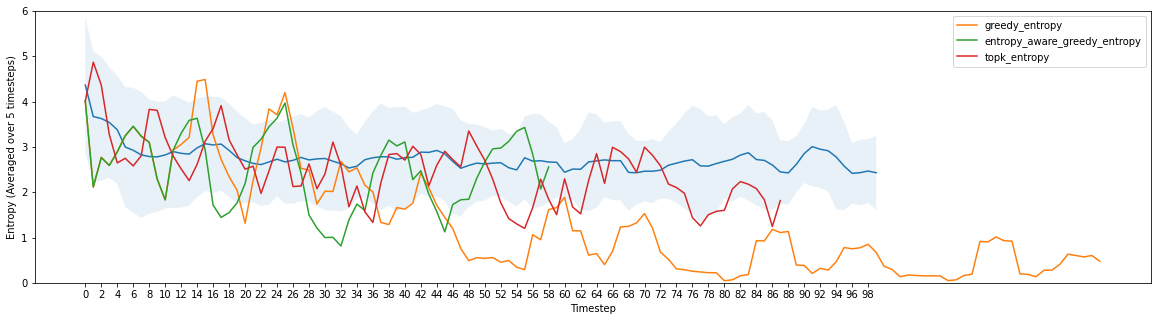

In [ ]:
datapoint = sample.iloc[0]
labeled_datapointm = process_datapoint(
    model=gpt2_model, datapoint=datapoint, width=5
)

eag_datapoint = eag_sample.iloc[0]
eag_labeled_datapoint = process_datapoint(
    model=gpt2_model, datapoint=eag_datapoint, width=5
)


topk_datapoint = topk_sample.iloc[0]
topk_labeled_datapoint = process_datapoint(
    model=gpt2_model, datapoint=topk_datapoint, width=5
)

lpdm = pd.DataFrame(labeled_datapointm, columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep','entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])
eag_lpdm = pd.DataFrame(eag_labeled_datapoint, columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep','entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])
topk_ldpm = pd.DataFrame(topk_labeled_datapoint, columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep','entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])



fig, ax = plt.subplots(figsize=(20, 5))

# plot_avg_entropies_mean_std(human_entropies, ax)
plot_avg_entropies_mean_std(human_ma_entropies, ax)
# human_ma_entropy_mean = np.mean(human_ma_entropies, axis=0).data
# human_ma_entropy_std = np.std(human_ma_entropies, axis=0).data

# ax = sns.lineplot(y=human_ma_entropy_mean, x=range(len(human_ma_entropy_mean)), ax=ax)
# ax.fill_between(range(len(human_ma_entropy_mean)), human_ma_entropy_mean -  2*human_ma_entropy_std, human_ma_entropy_mean +  2*human_ma_entropy_std, alpha=0.1)

# ax.set_xticks(np.arange(len(human_ma_entropy_mean), step=2))

lpdm.plot(x="index", y='entropy_ma', ylim=(0,6), ax=ax, label='greedy_entropy')
# lpdm.plot(x="index", y='dent', ylim=(-4,6), ax=ax)

eag_lpdm.plot(x="index", y='entropy_ma', ylim=(0,6), ax=ax, label='entropy_aware_greedy_entropy')

topk_ldpm.plot(x="index", y='entropy_ma', ylim=(0,6), ax=ax, label='topk_entropy')

# ax.set_xticklabels(lpdm['token'])
ax.set_xlabel("Timestep")
ax.set_ylabel("Entropy (Averaged over 5 timesteps)")

## Compute Average entropy across timesteps.

### For all model generated data

In [ ]:
# Greedy
model_gen_greedy_avg_entropy_pd, model_gen_greedy_entropies = compute_average_across_sequences(model_greedy_dataframe, gpt2_model, column_prefix='model_generated_greedy',  max_len=100, num_seq=NUM_SEQ)

model_gen_greedy_avg_ma_entropy_pd, model_gen_greedy_ma_entropies = compute_average_across_sequences(model_greedy_dataframe, gpt2_model, column_prefix='model_generated', width=5,  max_len=100, to_be_averaged="entropy_ma", num_seq=NUM_SEQ)

In [ ]:
# Nucleus
gpt2_model.reset()
model_gen_nucleus_avg_entropy_pd, model_gen_nucleus_entropies = compute_average_across_sequences(model_nucleus_dataframe, gpt2_model, column_prefix='model_generated_nucleus',  max_len=100, num_seq=NUM_SEQ)

model_gen_nucleus_avg_ma_entropy_pd, model_gen_nucleus_ma_entropies = compute_average_across_sequences(model_nucleus_dataframe, gpt2_model, column_prefix='model_generated', width=5,  max_len=100, to_be_averaged="entropy_ma", num_seq=NUM_SEQ)


In [ ]:
# Beam Search 
gpt2_model.reset()

model_gen_beam_avg_entropy_pd, model_gen_beam_entropies = compute_average_across_sequences(model_beam_search_dataframe, gpt2_model, column_prefix='model_generated_beam_search',  max_len=100, num_seq=NUM_SEQ)

model_gen_beam_avg_ma_entropy_pd, model_gen_beam_ma_entropies = compute_average_across_sequences(model_beam_search_dataframe, gpt2_model, column_prefix='model_generated_beam_search', width=5,  max_len=100, to_be_averaged="entropy_ma", num_seq=NUM_SEQ)

In [ ]:
model_vs_human_avg_entropies = pd.concat([human_avg_entropy_pd, model_gen_greedy_avg_entropy_pd, model_gen_nucleus_avg_entropy_pd, model_gen_beam_avg_entropy_pd],axis=1)

styles=['y--', 'g-']
model_vs_human_avg_entropies.plot( 
    title='Average Entropy vs Timesteps (Model Data w/ Repetition)', 
    figsize=(10, 5),
    xlabel="Timesteps", 
    ylabel="Average Entropy",
    style=styles,
)

NameError: name 'pd' is not defined

<AxesSubplot:title={'center':'Average Entropy vs Timesteps (Model Data w/ Repetition)'}, xlabel='Timesteps', ylabel='Average Entropy'>

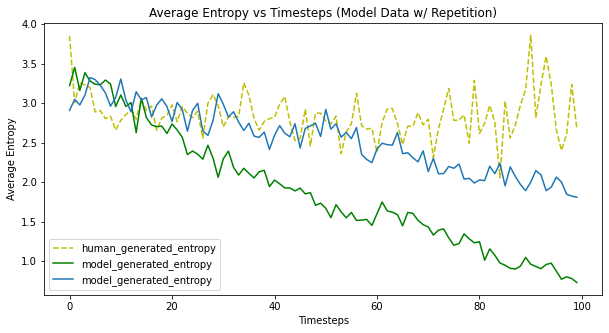

In [ ]:
model_vs_human_avg_ma_entropies = pd.concat([human_avg_ma_entropy_pd, model_gen_avg_greedy_ma_entropy_pd, model_gen_avg_nucleus_ma_entropy_pd],axis=1)

styles=['y--', 'g-']
model_vs_human_avg_ma_entropies.plot( 
    title='Average Entropy vs Timesteps (Model Data w/ Repetition)', 
    figsize=(10, 5),
    xlabel="Timesteps", 
    ylabel="Average Entropy",
    style=styles,
)

### For data with repetition

In [ ]:
model_counts = [0] * 128
model_cuml_entropy = [0.] * 128

with_repeat_dataframe = model_dataframe[model_dataframe.has_3_gram_repeat] 
for idx,with_repeat_datapoint in with_repeat_dataframe.sample(100).iterrows():
    with_repeat_labeled_datapoint = process_datapoint(
        model=gpt2_model, datapoint=with_repeat_datapoint,)

    wrlpd = pd.DataFrame(with_repeat_labeled_datapoint,  columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep', 'entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])
    
    for i,ent in wrlpd.entropy.iteritems():
        model_cuml_entropy[i] += ent
        model_counts[i] += 1

with_repeat_avg_entropy = [cuml_ent/count if count > 0 else 0 for (cuml_ent,count) in zip(model_cuml_entropy, model_counts)]

<AxesSubplot:title={'center':'Average Entropy vs Timesteps (Model Data w/ Repetition)'}, xlabel='Timesteps', ylabel='Average Entropy'>

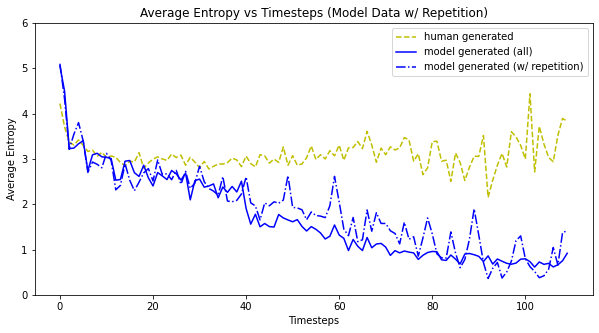

In [ ]:
with_repeat_avg_entropy_pd = pd.DataFrame(with_repeat_avg_entropy[:110],  columns=['model generated (w/ repetition)',])
with_repeat_vs_human_avg_entropies_pd = pd.concat([human_avg_entropy_pd, model_gen_avg_entropy_pd, with_repeat_avg_entropy_pd],axis=1)

styles=['y--', 'b-', 'b-.']
with_repeat_vs_human_avg_entropies_pd.plot(ylim=(0,6), 
    title='Average Entropy vs Timesteps (Model Data w/ Repetition)', 
    figsize=(10, 5),
    xlabel="Timesteps", 
    ylabel="Average Entropy",
    style=styles
)

### For data with w/o repetition

In [ ]:
model_counts = [0] * 128
model_cuml_entropy = [0.] * 128

without_repeat_model_entropy = np.zeros((100, 128))

without_repeat_dataframe = model_dataframe[model_dataframe.has_3_gram_repeat == False] 
for i, (idx,without_repeat_datapoint) in enumerate(without_repeat_dataframe.sample(100).iterrows()):
    without_repeat_labeled_datapoint = process_datapoint(
        model=gpt2_model, datapoint=without_repeat_datapoint,)
    worlpd = pd.DataFrame(without_repeat_labeled_datapoint, columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep', 'entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])
    
    for j,ent in worlpd.entropy.iteritems():
        without_repeat_model_entropy[i, j] = ent
        model_cuml_entropy[j] += ent
        model_counts[j] += 1

without_repeat_avg_entropy = [cuml_ent/count if count > 0 else 0 for (cuml_ent,count) in zip(model_cuml_entropy, model_counts)]

<AxesSubplot:title={'center':'Average Entropy vs Timesteps (Model Data w/o Repetition)'}, xlabel='Timesteps', ylabel='Average Entropy'>

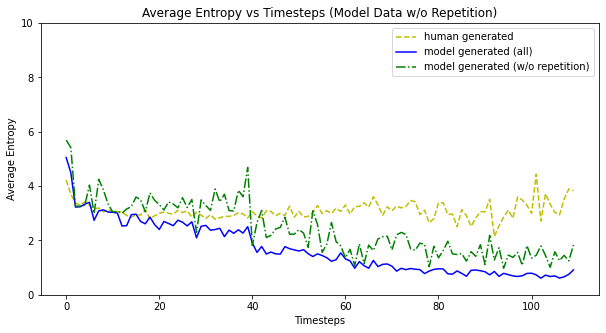

In [ ]:
without_repeat_avg_entropy_pd = pd.DataFrame(without_repeat_avg_entropy[:110],  columns=['model generated (w/o repetition)',])
without_repeat_vs_human_avg_entropies_pd = pd.concat([human_avg_entropy_pd, model_gen_avg_entropy_pd, without_repeat_avg_entropy_pd],axis=1)

styles=['y--', 'b-', 'g-.']
without_repeat_vs_human_avg_entropies_pd.plot(ylim=(0,10), 
    title='Average Entropy vs Timesteps (Model Data w/o Repetition)', 
    figsize=(10, 5),
    xlabel="Timesteps", 
    ylabel="Average Entropy",
    style=styles,
)

In [ ]:
model_counts = [0] * 128
model_cuml_entropy = [0.] * 128

with_label_repeat_dataframe = model_dataframe[model_dataframe.has_3_gram_label_repeat][model_dataframe.creps_num_3_gram_repeat == 0]
for idx, with_label_repeat_datapoint in with_label_repeat_dataframe.sample(100).iterrows():
    with_label_repeat_labeled_datapoint = process_datapoint(
        model=gpt2_model, datapoint=with_label_repeat_datapoint,)

    wlrlpd = pd.DataFrame(with_label_repeat_labeled_datapoint,  columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep', 'entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])
    # print(with_label_repeat_datapoint.model_text, end='\r', flush=True)
    for i,ent in wlrlpd.entropy.iteritems():
        model_cuml_entropy[i] += ent
        model_counts[i] += 1

with_label_repeat_avg_entropy = [cuml_ent/count if count > 0 else 0 for (cuml_ent,count) in zip(model_cuml_entropy, model_counts)]

/tmp/ipykernel_3276200/3881097992.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
with_label_repeat_avg_entropy_pd = pd.DataFrame(with_label_repeat_avg_entropy[:110],  columns=['model generated (w/ label repetition)',])
# with_label_repeat_avg_entropy_pd.plot(ylim=(0,10), 
#     title='Average Entropy vs Timesteps (Model Data w/ Label Repetition)', 
#     figsize=(10, 5),
#     xlabel="Timesteps", 
#     ylabel="Average Entropy"
# )

In [ ]:
model_counts = [0] * 128
model_cuml_entropy = [0.] * 128

with_context_repeat_dataframe = model_dataframe[(model_dataframe.creps_num_3_gram_repeat > 0)][ (model_dataframe.lreps_num_3_gram_repeat == 0)] 
for idx, with_context_repeat_datapoint in with_context_repeat_dataframe.sample(100).iterrows():
    with_context_repeat_labeled_datapoint = process_datapoint(
        model=gpt2_model, datapoint=with_context_repeat_datapoint,)

    wcrlpd = pd.DataFrame(with_context_repeat_labeled_datapoint,  columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep', 'entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])
    # print(with_label_repeat_datapoint.model_text, end='\r', flush=True)
    for i,ent in wcrlpd.entropy.iteritems():
        model_cuml_entropy[i] += ent
        model_counts[i] += 1

with_context_repeat_avg_entropy = [cuml_ent/count if count > 0 else 0 for (cuml_ent,count) in zip(model_cuml_entropy, model_counts)]

/tmp/ipykernel_3276200/1743032890.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
with_context_repeat_avg_entropy_pd = pd.DataFrame(with_context_repeat_avg_entropy[:110],  columns=['model generated (w/ context repetition)',])
# with_context_repeat_avg_entropy_pd.plot(ylim=(0,10), 
#     title='Average Entropy vs Timesteps (Model Data w/ context Repetition)', 
#     figsize=(10, 5),
#     xlabel="Timesteps", 
#     ylabel="Average Entropy"
# )

<AxesSubplot:title={'center':'Average Entropy vs Timesteps (Model Data w/ Repetition)'}, xlabel='Timesteps', ylabel='Average Entropy'>

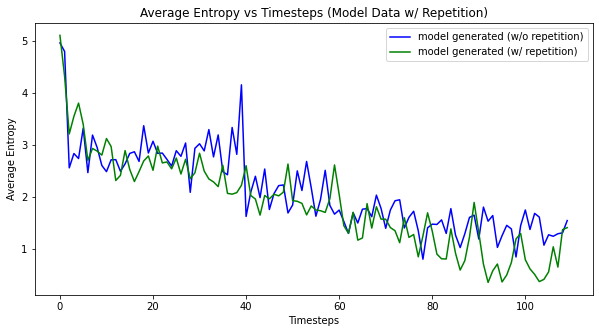

In [ ]:
model_rep_vs_non_rep_avg_entropies = pd.concat([without_repeat_avg_entropy_pd, with_repeat_avg_entropy_pd],axis=1)

# styles=['b-', 'g-']
model_rep_vs_non_rep_avg_entropies.plot( 
    title='Average Entropy vs Timesteps (Model Data w/ Repetition)', 
    figsize=(10, 5),
    xlabel="Timesteps", 
    ylabel="Average Entropy",
    style=styles,
)


# , ,

In [ ]:
model_rep_vs_non_rep_avg_entropies = pd.concat([human_avg_entropy_pd, without_repeat_avg_entropy_pd, with_repeat_avg_entropy_pd, with_label_repeat_avg_entropy_pd, with_context_repeat_avg_entropy_pd],axis=1)

styles=['y--', 'g-.', 'b-', 'c-', 'r-']
model_rep_vs_non_rep_avg_entropies.plot( 
    title='Average Entropy vs Timesteps (Model Data w/ Repetition)', 
    figsize=(10, 5),
    xlabel="Timesteps", 
    ylabel="Average Entropy",
    style=styles,
)

NameError: name 'human_avg_entropy_pd' is not defined

## Examples for generation from model data

In [ ]:
two_3_gram_repeats = model_dataframe[model_dataframe.creps_num_3_gram_repeat == 0][model_dataframe.lreps_num_3_gram_repeat > 0][model_dataframe.num_3_gram_repeat_length_normalized > 15]

sample = two_3_gram_repeats.sample(n=1)

print_sample(sample)


party from Sybille was set upon by <unk> tribesmen . Two were killed and nine others taken captive and dragged into the forest before rescuers could arrive . Cooke complained to Sultan <unk> <unk> at Kuta <unk> and the captured sailors were eventually recovered , although not before Sybille and


 his crew had been killed. Cooke's account of the incident is given in the following passage:  "The Sultan was very angry with me for having taken the ship and had taken the men with me... I was very angry with him and told him that I would not go to the Sultan's court... I was very angry with him and told him that I would not go to the Sultan's court... I was very angry with him and told him that I would not go to the Sultan's court... I was very angry with him and told him that I would not go to the Sultan's court... I was very angry with him and told him that I would not go to the Sultan's court... I was very angry with him and told him that I would not go to the Sultan's court... I was ver

/tmp/ipykernel_1916435/1890364151.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  two_3_gram_repeats = model_dataframe[model_dataframe.creps_num_3_gram_repeat == 0][model_dataframe.lreps_num_3_gram_repeat > 0][model_dataframe.num_3_gram_repeat_length_normalized > 15]
/tmp/ipykernel_1916435/1890364151.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  two_3_gram_repeats = model_dataframe[model_dataframe.creps_num_3_gram_repeat == 0][model_dataframe.lreps_num_3_gram_repeat > 0][model_dataframe.num_3_gram_repeat_length_normalized > 15]


In [ ]:
datapoint = sample.iloc[0]
labeled_datapointm = process_datapoint(
    model=gpt2_model, datapoint=datapoint, width=5
)
lpdm = pd.DataFrame(labeled_datapointm, columns=['index', 'token', 'is_rep', 'is_lrep', 'is_crep','entropy', 'entropy_ma', 'dent', 'ddent', 'dddent', 'probs', 'top-5'])
# normalized_entropy = lpdm.entropy_ma.to_numpy() - human_avg_entropy_pd[:len(lpdm.entropy)].to_numpy()[:, 0]



In [ ]:
lpdm['dent_ma'] = pd.Series(moving_average(lpdm.dent.to_numpy(), w=6))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:xlabel='index'>

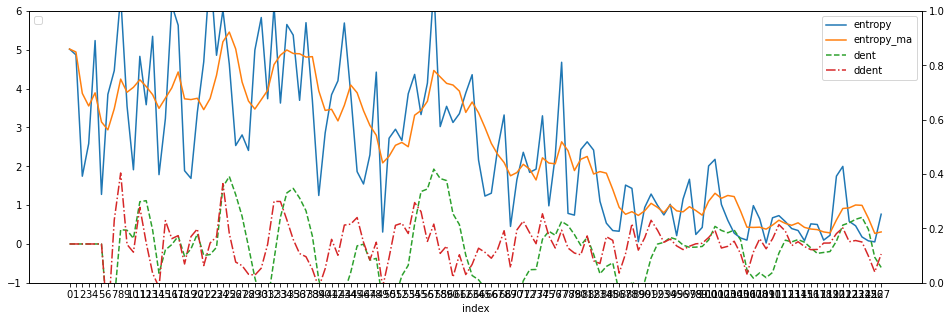

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
ax2 = ax.twinx()
# lpdm.plot.bar(x='index', y='is_lrep', ax=ax2, fill=True, rot='60')
ax2.legend(loc=2)
# lpdh.plot(x="index", y='entropy', ylim=(0,6), ax=ax)

lpdm.plot(x="index", y='entropy', ylim=(0,6), ax=ax, xticks=lpdm['index'])
lpdm.plot(x="index", y='entropy_ma', ylim=(0,6), ax=ax)
# lpdm.plot(x="index", y='probs', ylim=(0,1), ax=ax2)

lpdm.plot( y='dent',  ylim=(-1,6), figsize=(16, 5), ax=ax, linestyle='dashed')
lpdm.plot( y='ddent',  ylim=(-1,6), figsize=(16, 5),  ax=ax, linestyle='-.')

# lpdh.plot( y='dddent',  ylim=(-6,6),figsize=(16, 5),  ax=ax, linestyle='--')
# ax.set_xtizxcklabels(lpdm['index'])
# ax.set_xticklabels(lpdm['token'])
# ax.tick_params(axis='x', labelrotation=60)
# ax2.tick_params(axis='x', labelrotation=60)


<AxesSubplot:xlabel='index'>

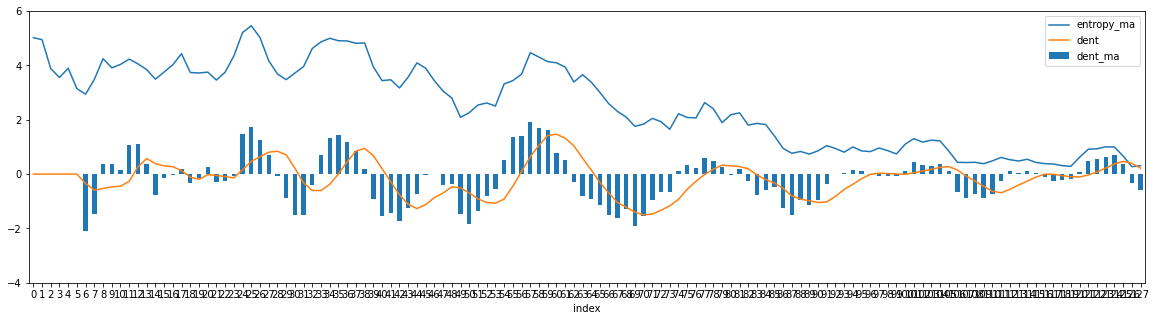

In [ ]:

fig, ax = plt.subplots(figsize=(20, 5))

# human_ma_entropy_mean = np.mean(human_ma_entropies, axis=0).data
# human_ma_entropy_std = np.std(human_ma_entropies, axis=0).data

# ax = sns.lineplot(y=human_ma_entropy_mean, x=range(len(human_ma_entropy_mean)), ax=ax)
# ax.fill_between(range(len(human_ma_entropy_mean)), human_ma_entropy_mean -  2*human_ma_entropy_std, human_ma_entropy_mean +  2*human_ma_entropy_std, alpha=0.1)

# ax.set_xticks(np.arange(len(human_ma_entropy_mean), step=2))

lpdm.plot(x="index", y='entropy_ma', ylim=(0,6), ax=ax)
lpdm.plot.bar(x="index", y='dent', ylim=(-4,6), ax=ax)
lpdm.plot(x="index",  y='dent_ma',  ylim=(-4,6), ax=ax)


In [ ]:
width = 5
print(lpdm.dent[6:].to_list())
print((lpdm.entropy_ma[6:].to_numpy() - lpdm.entropy_ma[:-6].to_numpy()).tolist())

[-2.9765625, -4.0390625, -2.07421875, 0.09765625, 1.6796875, 1.689453125, 1.87890625, 1.623046875, 0.25, -0.486328125, -1.689453125, -2.8359375, -3.30859375, -2.65234375, -1.400390625, -1.73828125, -1.40625, 0.345703125, 1.158203125, 0.509765625, -0.1328125, 0.625, 1.263671875, 0.525390625, -0.111328125, 0.66796875, 1.44921875, 0.421875, -0.931640625, -1.6044921875, -1.142578125, -1.07421875, -1.421875, -0.578125, 0.671875, 1.3603515625, 1.265625, 1.171875, 0.6953125, -0.00390625, -0.775390625, -0.326171875, -0.189453125, -0.216796875, -0.03515625, 1.0625, 1.53125, 0.1640625, -0.75, -1.146484375, -0.951171875, -1.69921875, -1.80078125, -0.189453125, 1.123046875, 0.6796875, 0.18359375, 0.55859375, 0.97265625, 0.32421875, -0.701171875, 0.47265625, 1.02734375, -0.021484375, -1.06640625, -1.671875, -1.0849609375, -1.5634765625, -1.58984375, -0.556640625, 0.23828125, 0.62890625, 0.0703125, -0.4150390625, -0.7060546875, -1.115234375, -1.486328125, -1.6728515625, -1.0859375, -0.6533203125, -0

## Repeat Baseline with EDC 


In [ ]:
lpdm.token

0           The
1          Best
2            of
3         Black
4         Women
5            âĢ
6             Ļ
7             s
8      Favorite
9            TV
10        Shows
11          The
12         Best
13           of
14        Black
15        Women
16           âĢ
17            Ļ
18            s
19     Favorite
20           TV
21        Shows
22        <eos>
Name: token, dtype: object

In [ ]:
dataframe = parse_world_log_metadatafile(repeat_baseline_gen_data)

neg_data = dataframe[dataframe.accuracy == 0]


pos_data = dataframe[dataframe.eval_label == 'pos']
for idx,datapoint in neg_data.sample(n=10).iterrows():
    labeled_datapoint = process_datapoint(classifier=repeat_edc_classifier, datapoint=datapoint, is_ltr=False)

    print_with_colors(labeled_datapoint, datapoint.eval_label, use_space=False)
    print('-' * 50)
dataframe


NameError: name 'repeat_baseline_gen_data' is not defined

In [ ]:


ronaldo_dataframe = dataframe[dataframe.context.str.contains("Bears GM Ryan Pace Vows ")]
for idx,datapoint in ronaldo_dataframe.iterrows():
    labeled_datapoint = process_datapoint(classifier=edc_classifier, datapoint=datapoint, is_ltr=False)

    print_with_colors(labeled_datapoint, datapoint.context, use_space=False)
    print('-' * 50)